In [1]:
options(max.print = 100)
filtered_erna_path = "Analysis/10X_PBMC/05_erna_preprocess/filtered_erna_pbmc_granulocyte_sorted_10k.rds"
cell_type_enhancers_path = "Analysis/10X_PBMC/cell_type_enhancers/PBMC_enhancers_id.tsv"
cell_idents_path = "Analysis/10X_PBMC/gex_clustering/PBMC_RNA_idents.RDS"
enhancers_metadata_path = "Analysis/enhancers/tcea_FANTOM/tcea_FANTOM_enhancers_metadata.txt"


In [2]:
# Parameters
filtered_erna_path = "Analysis/10X_PBMC/05_erna_preprocess/filtered_erna_pbmc_granulocyte_sorted_10k.rds"
cell_type_enhancers_path = "Analysis/10X_PBMC/cell_type_enhancers/PBMC_enhancers_id.tsv"
cell_idents_path = "Analysis/10X_PBMC/gex_clustering/PBMC_RNA_idents.RDS"
enhancers_metadata_path = "Analysis/enhancers/tcea_super_enhancers/tcea_super_enhancers_enhancers_metadata.txt"


In [3]:
setwd(here::here()) # set working directory to project root
getwd() 

[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [4]:
library(dplyr)
library(Matrix)
library(Seurat)
library(ggplot2)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Attaching SeuratObject



‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed



In [5]:
rna_enhancers = readRDS(filtered_erna_path)

In [6]:
rna_enhancers[1:10,1:10]

  [[ suppressing 10 column names ‘AAACAGCCAATCCCTT’, ‘AAACAGCCAATGCGCT’, ‘AAACAGCCACACTAAT’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                                   
chr10:101688237 . . . . . . . . . .
chr10:101753771 . . . . . . . . . .
chr10:101754231 . . . . . . . . . .
chr10:101754591 . . . . . . . . . .
chr10:102791461 . . . . . . . . . .
chr10:103702315 . . . . . . . . . .
chr10:103703525 . . . . . . . . . .
chr10:103703865 . . . . . . . . . .
chr10:103875723 . . . . . . . . . .
chr10:103875903 . . . . . . . . . .

In [7]:
pbmc_erna = CreateSeuratObject(counts = rna_enhancers, project = "PBMC_eRNA", min.cells = 3, min.features = 3)

In [8]:
pbmc_erna

An object of class Seurat 
10570 features across 10535 samples within 1 assay 
Active assay: RNA (10570 features, 0 variable features)

[1] "chr2:101368698" "chr9:140133788" "chr10:17065282" "chr1:28561957" 
 [5] "chr3:112217226" "chr1:173381204" "chr20:32142575" "chr12:47611612"
 [9] "chr10:17258893" "chr3:30722228"

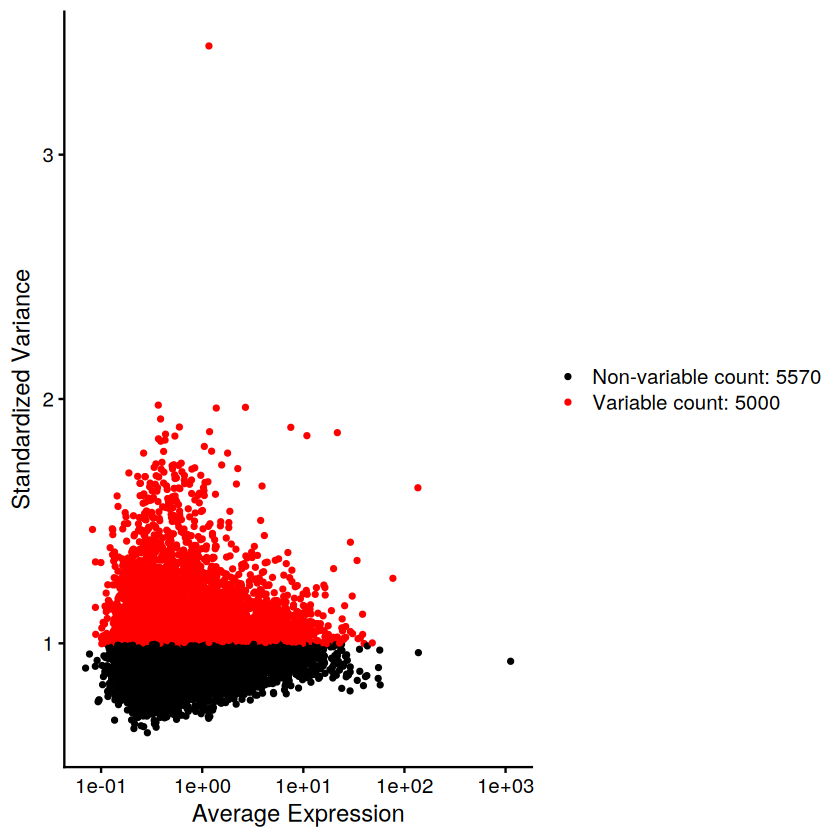

In [9]:

# Normalize and identify variable features
#pbmc_erna <- NormalizeData(pbmc_erna, normalization.method = "LogNormalize", scale.factor = 1e6)
pbmc_erna <- FindVariableFeatures(pbmc_erna, selection.method = "vst", nfeatures = 5000)

# Visualize variable features
top10 <- head(VariableFeatures(pbmc_erna), 10)
top10
VariableFeaturePlot(pbmc_erna)

Centering and scaling data matrix



PC_ 1 
Positive:  chr14:92331164, chr18:60961158, chr12:47609144, chr14:92320124, chr6:41943612, chr11:95993418, chr1:167483768, chr14:61928807, chr5:35867902, chr4:40220788 
	   chr14:61969919, chr17:40401305, chr5:110603209, chr1:167483458, chr10:6623429, chr1:167483218, chr1:25892258, chr6:138189750, chr11:128391139, chr22:40338587 
	   chr1:226904466, chr6:41960152, chr9:130701860, chr1:167439958, chr8:126930752, chr11:128345755, chr4:40227908, chr12:47611152, chr14:92328524, chr1:207084895 
Negative:  chr5:149790157, chr6:14123786, chr1:150542005, chr22:50978939, chr6:14121776, chr19:14505744, chr2:208393577, chr16:85941057, chr22:50971199, chr1:150538419 
	   chr5:88177719, chr1:152008786, chr10:17258893, chr6:15265425, chr19:14497407, chr2:145243619, chr17:27619549, chr1:45187299, chr19:44173872, chr2:122288743 
	   chr2:8823647, chr10:91093294, chr3:172240524, chr19:14497107, chr17:10017571, chr2:9690804, chr16:23937597, chr10:3825653, chr19:1256163, chr5:142551692 
PC_ 2 
Posi

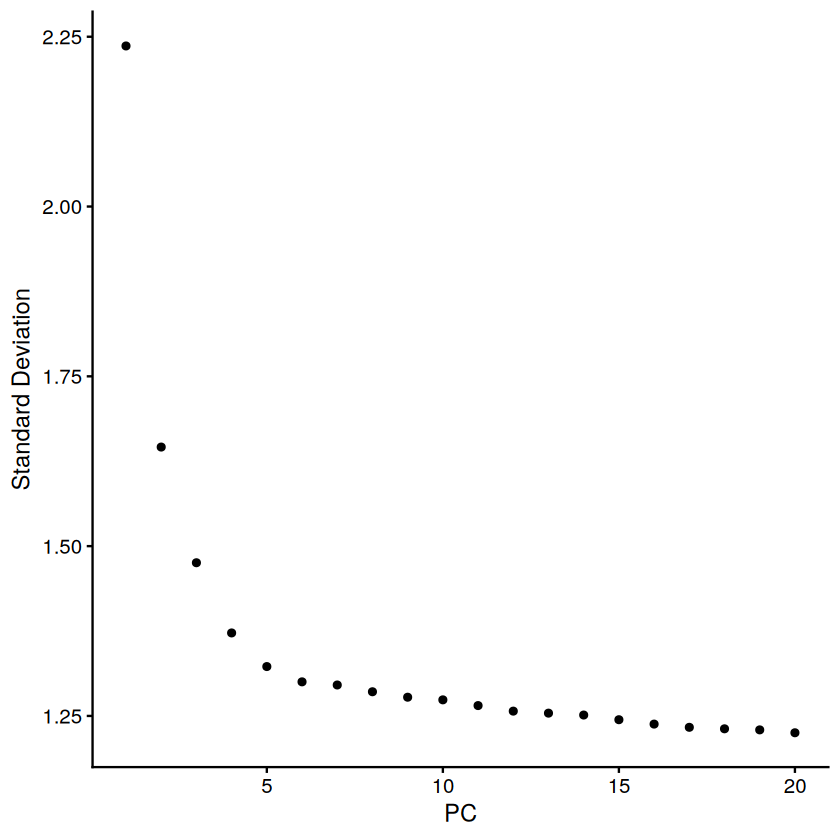

In [10]:
# Scale, PCA
pbmc_erna <- ScaleData(pbmc_erna, features = VariableFeatures(pbmc_erna))
pbmc_erna <- RunPCA(pbmc_erna, features = VariableFeatures(object = pbmc_erna))
ElbowPlot(pbmc_erna)



In [11]:
# Neighborhood graph, clustering and UMAP
pbmc_erna <- FindNeighbors(pbmc_erna, dims = 1:10)
pbmc_erna <- FindClusters(pbmc_erna, resolution = 0.2)



Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10535
Number of edges: 319372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9073
Number of communities: 7
Elapsed time: 1 seconds


In [12]:
pbmc_erna <- RunUMAP(pbmc_erna, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


15:23:21 UMAP embedding parameters a = 0.9922 b = 1.112



15:23:21 Read 10535 rows and found 10 numeric columns



15:23:21 Using Annoy for neighbor search, n_neighbors = 30



15:23:22 Building Annoy index with metric = cosine, n_trees = 50



0%   10   20   30   40   50   60   70   80   90   100%



[----|----|----|----|----|----|----|----|----|----|



*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


|



15:23:23 Writing NN index file to temp file /tmp/RtmpgHBodd/file39436f115e073f



15:23:23 Searching Annoy index using 1 thread, search_k = 3000



15:23:27 Annoy recall = 100%



15:23:27 Commencing smooth kNN distance calibration using 1 thread


 with target n_neighbors = 30



15:23:29 Initializing from normalized Laplacian + noise (using irlba)



15:23:29 Commencing optimization for 200 epochs, with 434422 positive edges



15:23:29 Using rng type: pcg



15:23:34 Optimization finished



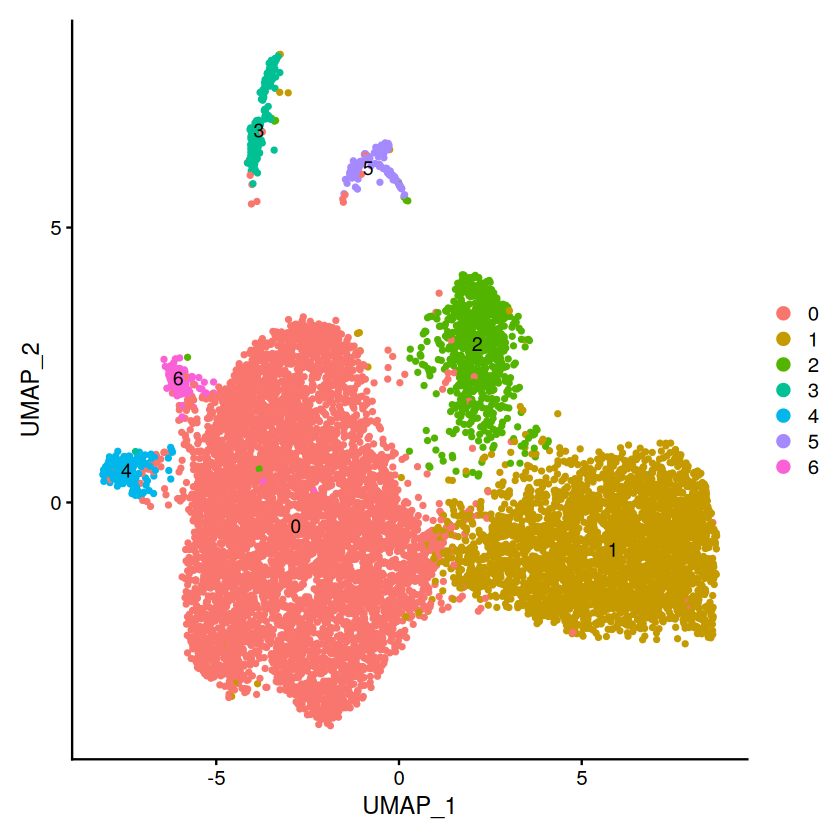

In [13]:
# Plot UMAP
DimPlot(pbmc_erna, reduction = "umap", label = TRUE,pt.size = 1) 

In [14]:
cell_type_idents = readRDS(cell_idents_path)
rownames(cell_type_idents) = gsub("-1","",rownames(cell_type_idents))
head(cell_type_idents)

,pbmc@active.ident
,<fct>
AAACAGCCAATCCCTT,cd4
AAACAGCCAATGCGCT,cd8
AAACAGCCACACTAAT,cd8
AAACAGCCACCAACCG,cd8
AAACAGCCAGGATAAC,cd4
AAACAGCCAGTTTACG,cd4


In [15]:
unique(cell_type_idents[1])

,pbmc@active.ident
,<fct>
AAACAGCCAATCCCTT,cd4
AAACAGCCAATGCGCT,cd8
AAACATGCACCGGCTA,undefined_t_cells
AAACCAACACAATGCC,cd14
AAACCGAAGCTGGACC,cd4_in_cd14
AAAGCAAGTTAACGGC,b_cells
AACAGATAGTAACCCG,cd4_near_b


In [16]:
pbmc_erna  = AddMetaData(object = pbmc_erna, metadata = cell_type_idents,col.name = "cell_type")

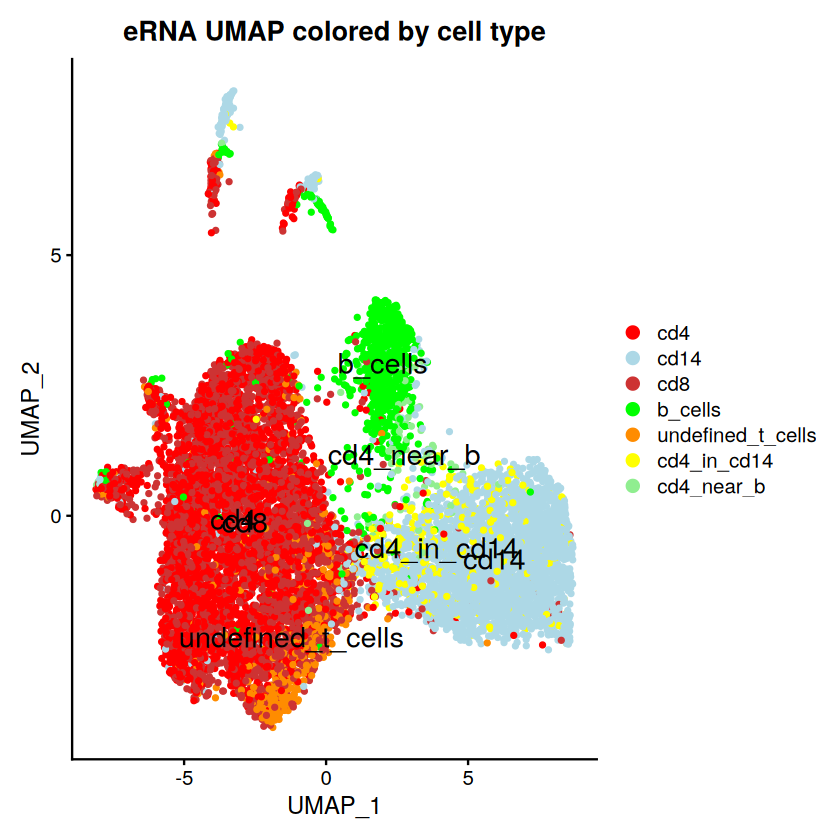

In [17]:
DimPlot(pbmc_erna, reduction = "umap", group.by = "cell_type", label = TRUE,pt.size = 1,label.size = 6)+ 
  ggtitle("eRNA UMAP colored by cell type")+
  #set colors
  scale_color_manual(values =c(
    "cd4" = "red",
    "cd8" = "brown3",
    "undefined_t_cells" = "darkorange",
    "cd4_in_cd14" = "yellow",
    "cd4_near_b" = "lightgreen",
    "b_cells" = "green",
    "cd14" = "lightblue",
    "other" = "gray"  # Add other cell types here if needed
))


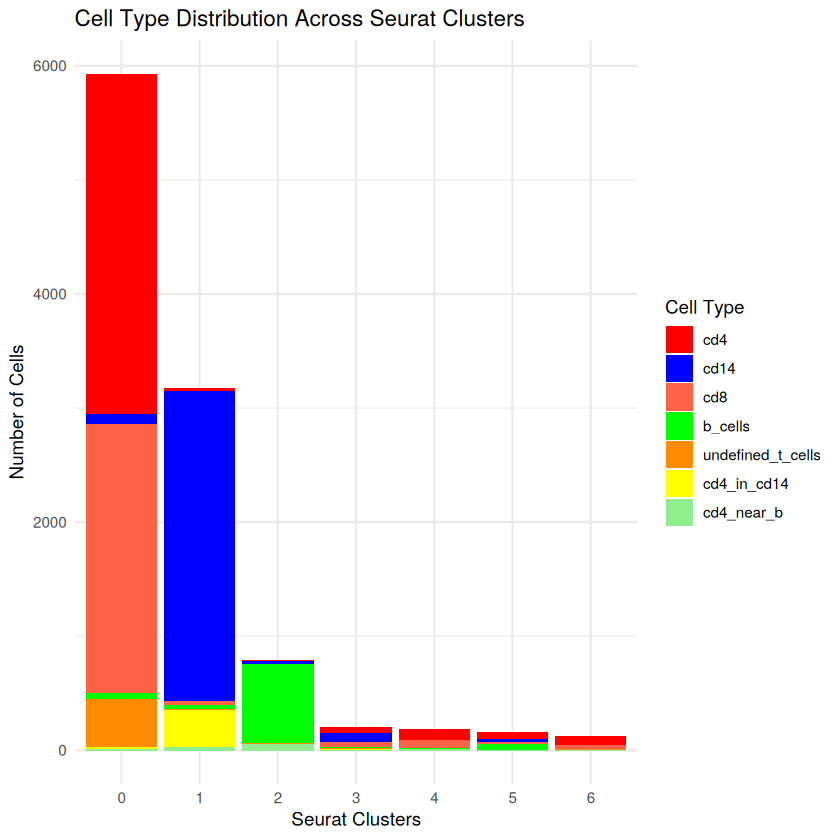

In [18]:
#stacked barplot of cell types per cluster
cluster_celltype_table = table(pbmc_erna$seurat_clusters, pbmc_erna$cell_type)
cluster_celltype_df = as.data.frame(cluster_celltype_table)

ggplot(cluster_celltype_df, aes(x=Var1, y=Freq, fill=Var2)) +
    geom_bar(stat="identity") +
    labs(x="Seurat Clusters", y="Number of Cells", fill="Cell Type") +
    ggtitle("Cell Type Distribution Across Seurat Clusters") +
    theme_minimal()+
    scale_fill_manual(values = c(
    "cd4" = "red",
    "cd8" = "tomato1",
    "undefined_t_cells" = "darkorange",
    "cd4_in_cd14" = "yellow",
    "cd4_near_b" = "lightgreen",
    "b_cells" = "green",
    "cd14" = "blue",
    "other" = "gray"  # Add other cell types here if needed
))

In [19]:
cluster_0_vs_cluster1_markers = FindMarkers(pbmc_erna, ident.1 = 0, ident.2 = 1, min.pct = 0)


For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [20]:
dim(cluster_0_vs_cluster1_markers)
head(cluster_0_vs_cluster1_markers,20)

[1] 10327     5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:150542005,0.000000e+00,-Inf,0.033,0.330,0.000000e+00
chr22:50978939,0.000000e+00,-Inf,0.014,0.275,0.000000e+00
chr5:149791847,0.000000e+00,-Inf,0.017,0.311,0.000000e+00
chr16:85941057,3.034977e-301,-Inf,0.005,0.233,3.207970e-297
chr6:14121776,2.887000e-282,-Inf,0.006,0.224,3.051559e-278
chr5:88177719,1.228848e-276,-Inf,0.003,0.209,1.298892e-272
chr5:149791627,6.927696e-219,-Inf,0.009,0.189,7.322575e-215
chr4:154606242,6.145685e-214,-Inf,0.003,0.164,6.495989e-210
chr1:150721171,2.670473e-209,-Inf,0.008,0.179,2.822690e-205


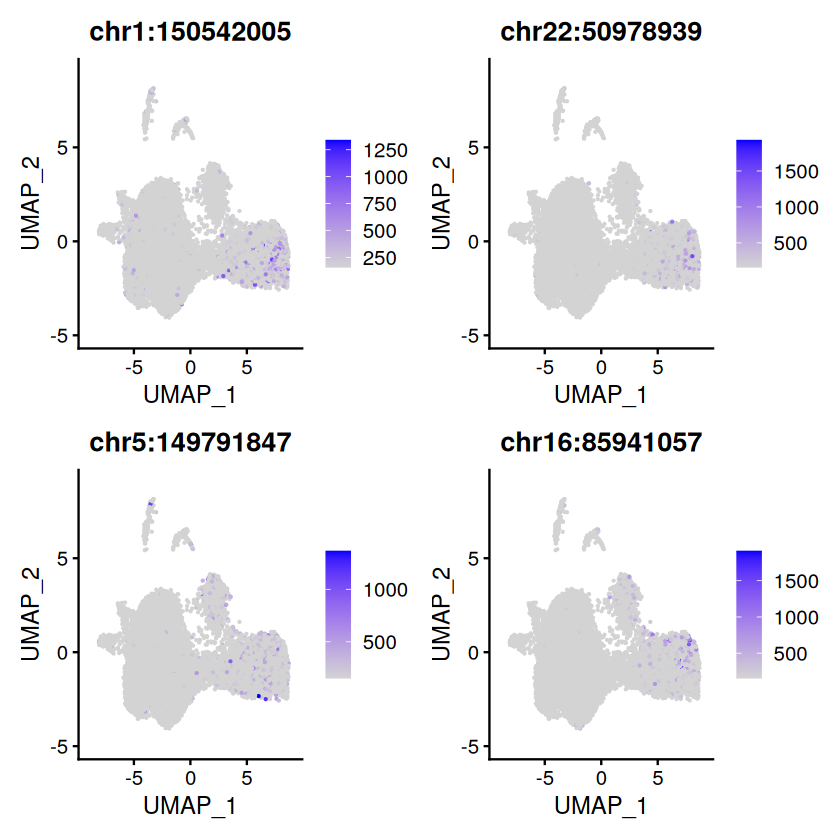

In [21]:
FeaturePlot(pbmc_erna, features = rownames(cluster_0_vs_cluster1_markers)[1:4], min.cutoff = "q9")

In [22]:
top_de_enhancers = rownames(head(cluster_0_vs_cluster1_markers,20)) %>% gsub("-","_",.)
top_de_enhancers

[1] "chr1:150542005" "chr22:50978939" "chr5:149791847" "chr16:85941057"
 [5] "chr6:14121776"  "chr5:88177719"  "chr5:149791627" "chr4:154606242"
 [9] "chr1:150721171" "chr10:17258893" "chr12:11803334" "chr1:152008786"
[13] "chr3:122400887" "chr11:61734049" "chr6:88409941"  "chr8:37746565" 
[17] "chr2:70145008"  "chr20:30640969" "chr1:212783182" "chr3:122401817"

In [23]:
enhancers_metadata <- data.table::fread(enhancers_metadata_path, header = T, sep = "\t", data.table = FALSE)

In [24]:
enhancers_metadata

chr,start,end,id,type,gene_intersection,bp_to_closest_gene,length
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,904377,904678,chr1:839908,1,intergenic,19245,301
1,904377,904678,chr1:839908,1,intergenic,19245,301
1,905146,905447,chr1:840677,1,intergenic,18476,301
1,905176,905477,chr1:840707,1,intergenic,18446,301
1,905216,905517,chr1:840747,1,intergenic,18406,301
1,931288,931589,chr1:866819,1,intronic,0,301
1,931288,931589,chr1:866819,1,intronic,0,301
1,931518,931819,chr1:867049,1,intronic,0,301
1,931518,931819,chr1:867049,1,intronic,0,301


In [25]:
# deg = cluster_0_vs_cluster1_markers %>% filter(p_val_adj < 0.05 & abs(avg_log2FC) > 2)
# enhancers_metadata$id = gsub("_","-",enhancers_metadata$id)
# rownames(enhancers_metadata) = enhancers_metadata$id
# #barplot how many are intergenic or intragenic
# deg_metadata = enhancers_metadata[match(rownames(deg), enhancers_metadata$id), ]
# table(deg_metadata$gene_intersection )